In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

from d2l import torch as  d2l


In [2]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='./data',transform=trans, train=True,download=True)

mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=trans, download=True)

In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

array([<Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'coat'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'bag'}>, <Axes: title={'center': 'coat'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'dress'}>, <Axes: title={'center': 'bag'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'coat'}>], dtype=object)

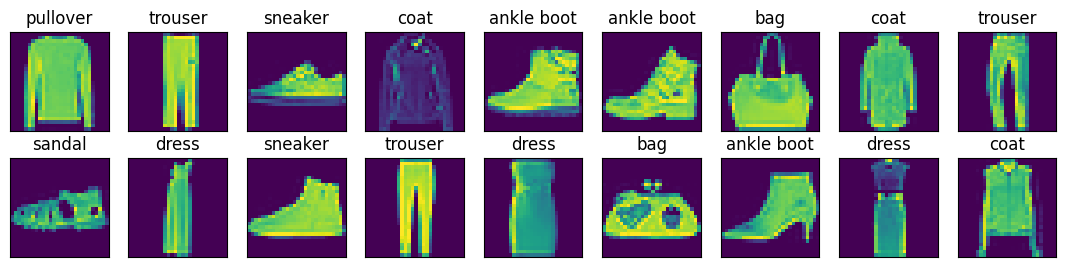

In [4]:
X,y = next(iter(data.DataLoader(mnist_train,shuffle=True, batch_size=18)))
d2l.show_images(X.reshape(18, 28, 28) ,2,9,titles= d2l.get_fashion_mnist_labels(y))

In [5]:
X.shape

torch.Size([18, 1, 28, 28])

In [6]:
#读取小批量

batch_size =256

num_worker = 4
train_iter = data.DataLoader(mnist_train, batch_size , shuffle=True, num_workers = num_worker)

#查看时间

timer = d2l.Timer()

for X,y in train_iter:
    continue
f'{timer.stop()} sec'

'25.704708099365234 sec'

## Softmax回归

In [7]:
batch_size =256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)


In [8]:
#初始化模型
num_input = 784
num_output = 10
W = torch.normal(0, 0.01, size=(num_input, num_output), requires_grad=True)
b = torch.zeros(num_output, requires_grad=True)

In [9]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim = True) #按行求和，理解成把每个特征的exp求和
    return X_exp/partition #广播机制每个元素都除以partition

In [10]:
#测试
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)


(tensor([[0.1738, 0.0917, 0.3636, 0.1195, 0.2514],
         [0.1205, 0.4324, 0.1066, 0.0686, 0.2720]]),
 tensor([1.0000, 1.0000]))

In [11]:
#soft max实现
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [ ]:
#定义损失函数

In [33]:
#Python的for循环迭代预测（这往往是低效的）， 而是通过一个运算符选择所有元素
y = torch.tensor([0,2]) #真是标签分别为第0类，和第2类，这里没做独热编码操作
y_hat = torch.tensor([[0.1, 0.3, 0.6],[0.3, 0.2, 0.5]])
y_hat[(range(len(y_hat)),y)] #分别为y_hat[0,0] , y_hat[1,2]


tensor([0.1000, 0.5000])

In [36]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)),y])
cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [54]:
#计算准确率 
def accuracy(y_hat, y):
    if len(y_hat.shape) >1 and y_hat.shape[1]>1:
        y_hat = y_hat.argmax(axis=1) #计算出每行数据中最大的概率对应的索引,索引也可以对应类别
    cmp = y_hat.type(y.dtype) == y #cmp = [false, true] 因为y_hat变成了[2,2],代表预测的第二类，第二类概率最大，
                                   #而y的真实为第0类，第二类，所以之预测成功一个
    return float(cmp.type(y.dtype).sum()) / len(y)

accuracy(y_hat, y)

0.5

In [66]:
#softmax回归的简洁实现
import torch
from torch import nn
from d2l import torch as  d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size) #dataload


40

In [70]:
#初始化模型参数

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10)) #定义网络

def init_weights(m):
    if type(m) ==nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
        
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [91]:
n = torch.tensor([-1,-2,-2.1,-3])
exp_n = torch.exp(n)
exp_n

tensor([0.3679, 0.1353, 0.1225, 0.0498])

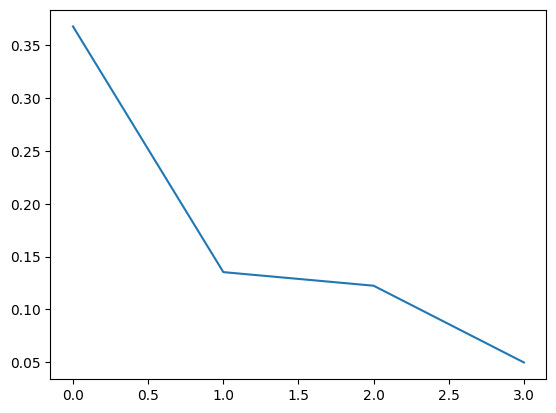

In [92]:
import matplotlib.pyplot as plt

plt.plot(exp_n)

在sofmax中指数计算前,要将每个元素a与这组数中最大值相减，为了避免a很大，他的指数结果更大，导致计算机识别不了很大的数，上溢
一般softmax 指数变换后要进行交叉熵损失操作，交叉熵用到对数，意义在于将softmax的结果即概率对数化,避免下溢，因为a-max可能是一个较大的负值，对数变化后接近于0

In [102]:
#交叉熵计算损失
loss = nn.CrossEntropyLoss(reduction='none')

#优化算法,优化参数
trainer = torch.optim.SGD(net.parameters(),lr= 0.1)

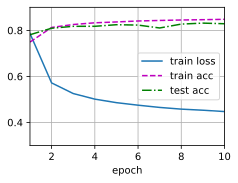

In [103]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)